In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# Load Data

In this section, we start by loading the dataset. Most of the data is binary except for one column, labeled `ID`, which is a unique identifier for each data point. We treat `ID` as an index rather than a feature, since it does not contribute to the clustering analysis. Using it as an index allows us to focus solely on the binary data for the unsupervised learning tasks that follow.

### Data Preprocessing
- **Binary Data**: All columns except `ID` contain binary data, which is particularly useful when applying distance-based algorithms such as Jaccard, Hamming, etc.
- **Indexing**: We set the `ID` column as the index to easily reference and manage data points.


In [2]:
data = pd.read_csv("hw2_dataset.csv")
print(data.shape)
data.head()

(969, 1025)


,ID,D_0,D_1,D_2,D_3,D_4,D_5,D_6,D_7,D_8,...,D_1014,D_1015,D_1016,D_1017,D_1018,D_1019,D_1020,D_1021,D_1022,D_1023
0,AAEAMMIUQZAASJ-MRXNPFEDSA-N,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,0,1,1,1
1,AAEFNWQXBPYXAC-UHFFFAOYSA-N,1,1,1,1,0,1,1,1,0,...,1,0,1,1,1,0,0,1,1,1
2,AAMHSIWFDKXUMZ-UHFFFAOYSA-N,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,0,0,1,1
3,AAPQXEOSVSLLMB-UHFFFAOYSA-N,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,AARXXEHXOBTROW-UHFFFAOYSA-N,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,0,1,1,1


Check if the values in the DataFrame are all binary (as they look), except, obviously the 1st column, ID.

In [3]:
set(data.values[:,1:].flatten())

{0, 1}

Also from before we can ensure that we don't have any null values, so we don't have to worry about that case.

In [4]:
data.isna().sum().sum()

np.int64(0)

Now I'm going to check if the "ID" columns are unique values or not. To do that I'll check if the number of unique values is equal to the number of rows (969)

In [5]:
len(data["ID"].unique())

969

In this case it is therefore I'm going to transform the index as the ID column.

In [6]:
data.set_index("ID", inplace=True)
print(data.shape)
data.head()

(969, 1024)


,D_0,D_1,D_2,D_3,D_4,D_5,D_6,D_7,D_8,D_9,...,D_1014,D_1015,D_1016,D_1017,D_1018,D_1019,D_1020,D_1021,D_1022,D_1023
ID,,,,,,,,,,,,,,,,,,,,,
AAEAMMIUQZAASJ-MRXNPFEDSA-N,1,1,1,1,1,1,1,0,1,0,...,1,1,1,1,1,1,0,1,1,1
AAEFNWQXBPYXAC-UHFFFAOYSA-N,1,1,1,1,0,1,1,1,0,0,...,1,0,1,1,1,0,0,1,1,1
AAMHSIWFDKXUMZ-UHFFFAOYSA-N,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,0,0,1,1
AAPQXEOSVSLLMB-UHFFFAOYSA-N,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
AARXXEHXOBTROW-UHFFFAOYSA-N,1,1,1,1,1,1,1,0,1,0,...,1,1,1,1,1,1,0,1,1,1


# Unsupervised Learning

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import umap



Now we move into the core of our project, which involves clustering the data using different algorithms and distances. 

### Process of Evaluation and Plotting

1. **Distances**: We start by defining a set of distance metrics that we want to study. The goal is to evaluate how each algorithm behaves with different distance functions, especially given the binary nature of the data.
2. **t-SNE and UMAP**: Since we cannot easily visualize high-dimensional data, we reduce the dimensionality using two methods: t-SNE and UMAP. Both map the data down to two dimensions, allowing us to plot the results of each algorithm.
3. **`show_results` function**: This function serves as a wrapper to run each clustering algorithm, passing it the necessary arguments, and subsequently generating plots to visually evaluate the clustering results for multiple distance metrics.


We begin by defining the distance metrics we want to evaluate. These distances will later be passed as arguments to the clustering algorithms.

In [ ]:
distances = ['euclidean', 'manhattan', 'cosine', 'jaccard', 'hamming']

Next, we apply two popular dimensionality reduction techniques to create visual representations of our high-dimensional data:

 - t-SNE: t-Distributed Stochastic Neighbor Embedding, which helps preserve the local structure of the data when reduced to two dimensions.
 - UMAP: Uniform Manifold Approximation and Projection, which is another method for reducing dimensionality, often preserving more of the global structure.

In [ ]:
X = TSNE(n_components=2, random_state=10).fit_transform(data)
X2 = umap.UMAP(random_state=10).fit_transform(data)

Now, `X` and `X2` hold the 2D projections of the original data, which will be used in subsequent plots.

## General Function: show_results

We define a general function `show_results()` that:
- **Receives an algorithm**: This is the clustering algorithm to be applied to the data.
- **Accepts arguments (`args`)**: These will include parameters specific to each algorithm, such as distance metrics or algorithm-specific hyperparameters.
- **Processes and plots**: The function generates side-by-side scatter plots for both t-SNE and UMAP projections, color-coded by the predicted cluster labels.


In [67]:
def show_results(algorithm, args=dict()):
    global data, X, X2
    info = algorithm(data, args)
    labels, score, name = info["labels"], info["score"], info["name"]
    dist = None
    if "dist" in info.keys():
        dist = info["dist"]


    plt.figure(figsize=(12, 6))
    plt.suptitle(f"{name} Algorithm", fontsize=16, weight='bold')
    plt.title(f"[ score = {round(score, 3) if type(score) != str else score}" + (" ]" if dist == None else f" | distance = {dist} ]"))

    i = 1
    for Xplot, v in zip([X, X2], ["t-SNE", "UMAP"]):
        plt.subplot(1, 2, i)
        sns.scatterplot(x=Xplot[:, 0], y=Xplot[:, 1], hue=labels, 
                        palette='viridis', edgecolor=None, s=50, marker="*", linewidth=2,
                        alpha=0.7, legend=True)
        plt.xticks([])
        plt.yticks([])
        plt.title(v, fontsize=14, weight='semibold')
        i += 1

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make space for the title
    plt.show()

This function simplifies the process of running different algorithms and plotting their results across multiple distance metrics. It handles the visualization side by using both t-SNE and UMAP projections, allowing us to inspect how each algorithm clusters the data.

## Determine the Optimal Number of Clusters Using:

Before applying clustering algorithms, it's important to determine the optimal number of clusters. Two commonly used methods for this are:

1. **Elbow Method**: This method involves plotting the sum of squared distances between data points and their corresponding cluster centroids (inertia) for a range of cluster numbers. The point where the inertia curve starts to flatten, forming an "elbow," suggests the optimal number of clusters. A steep drop before this point indicates that adding more clusters reduces variance significantly, but after the elbow, the improvement becomes marginal.

2. **Silhouette Score**: This method evaluates how well-separated the clusters are. The silhouette score ranges from -1 to 1, where a score close to 1 indicates that the clusters are well-separated. We compute the silhouette score for different numbers of clusters and select the one that maximizes this score.

Both methods provide guidance for choosing the right number of clusters for the algorithms, which will be used in conjunction with different distance metrics and clustering techniques like KMeans, Agglomerative Clustering, DBSCAN, and GMM.


In [33]:
def elbow_method(data, nmax=11):
    distortions = []
    for k in range(1, nmax):
        kmeans = KMeans(n_clusters=k, random_state=10)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)

    # Set the Seaborn style and figure size
    sns.set(style="whitegrid")
    
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, nmax), distortions, marker='o', color='b', linestyle='-', markersize=8, label='Distortion')
    
    # Customize plot aesthetics
    plt.xticks(np.arange(1, nmax, step=1))  # Ensure x-ticks are integers
    plt.yticks([])#np.arange(min(distortions), max(distortions) + 500, step=500))  # Customize y-ticks if needed
    plt.xlabel('Number of Clusters', fontsize=12)
    plt.ylabel('Distortion (Inertia)', fontsize=12)
    plt.title('Elbow Method for Optimal Number of Clusters', fontsize=14)
    
    # Add a grid, legend, and adjust layout
    plt.grid(True)
    plt.legend(loc='best', fontsize=10)
    plt.tight_layout()

    plt.show()

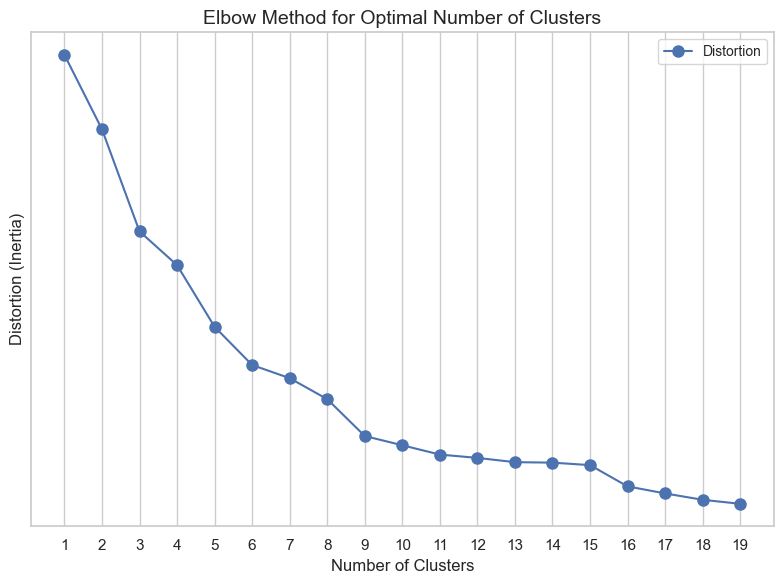

In [34]:
elbow_method(data, nmax=20)

### (b) Silhouette Method

In [30]:
def silhouette_method(data, nmax=20):
    silhouette_scores = []
    ks = range(2, nmax)
    for k in ks:  # Silhouette score cannot be calculated for k=1
        kmeans = KMeans(n_clusters=k, random_state=10)
        labels = kmeans.fit_predict(data)
        score = silhouette_score(data, labels)
        silhouette_scores.append(score)
    
    plt.figure(figsize=(8, 6))
    plt.plot(ks, silhouette_scores, marker='o', color='g')
    plt.xticks(ks)
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Method for Optimal k')
    plt.grid(True)
    plt.show()

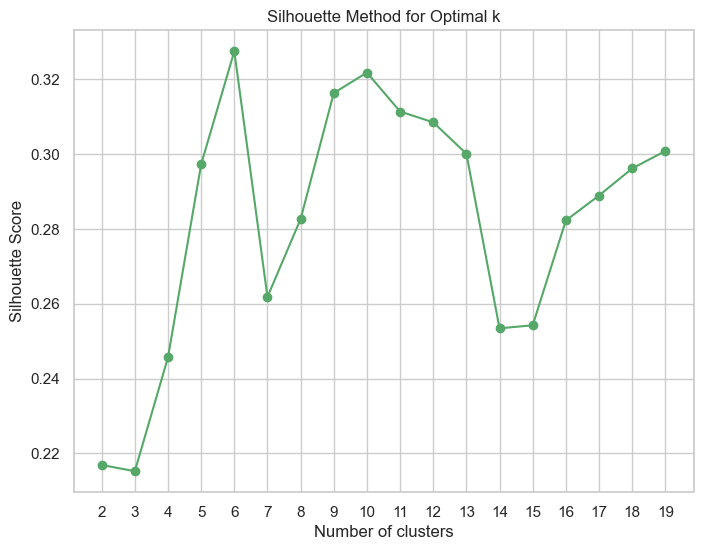

In [31]:
silhouette_method(data, nmax=20)

Now based on our Silhouette plot we choose the number of clusters

In [32]:
kmeans = KMeans(n_clusters=6, random_state=10)
kmeans_labels = kmeans.fit_predict(data)
print(f"K-means Silhouette Score: {silhouette_score(data, kmeans_labels)}")

K-means Silhouette Score: 0.32748142556690324


## 1. KMEANS

For the first clustering algorithm, we use **KMeans**. This algorithm partitions the data into a predefined number of clusters (`n_clusters`), minimizing the variance within each cluster.

In [43]:
def kmeans_algorithm(data, args):
    kmeans = KMeans(**args)
    labels = kmeans.fit_predict(data)
    score = silhouette_score(data, labels)
    return {
        "labels": labels,
        "score": score,
        "name": "K-MEANS"
    }


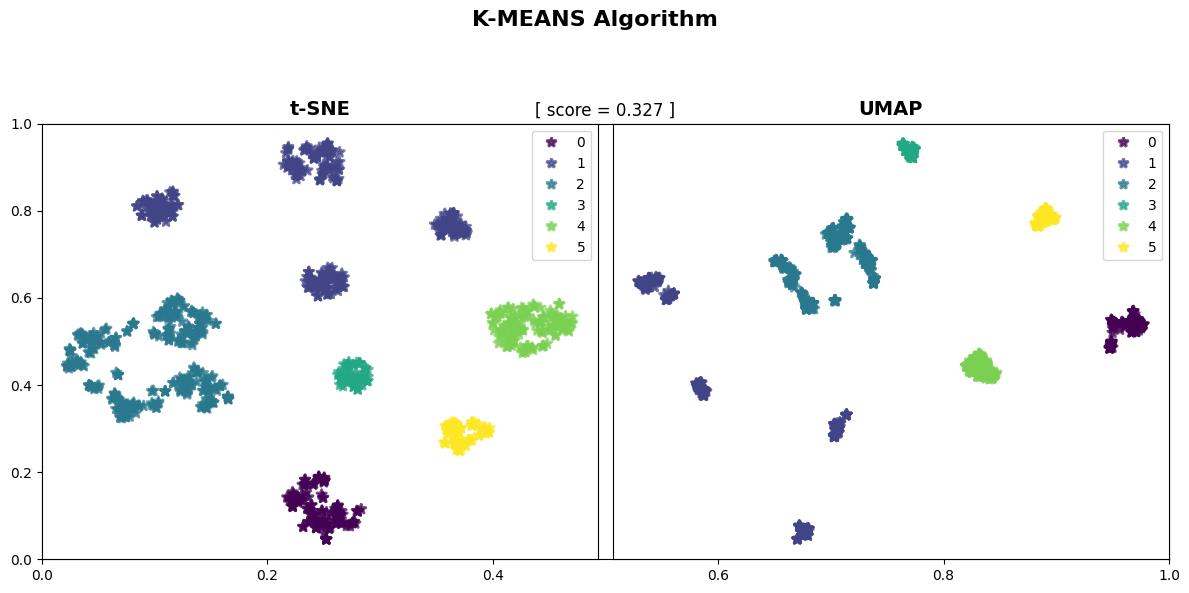

In [68]:
args = {"n_clusters": 6, "random_state":10}
show_results(kmeans_algorithm, args)

Looking at the **KMeans clustering result** with a silhouette score of **0.327**, we observe the formation of several well-separated clusters in both the t-SNE and UMAP visualizations. While KMeans identified **6 clusters** in this run, the visualizations suggest there could be more distinct groups, especially since certain clusters appear to be further divided into subgroups.

Upon closer inspection, the plots seem to suggest the presence of **9 clusters** rather than 6. Therefore, I want to further explore this possibility by running KMeans with **9 clusters** and comparing the silhouette score to verify if this increases the quality of the clustering results. This could potentially lead to a more accurate reflection of the underlying structure of the data.

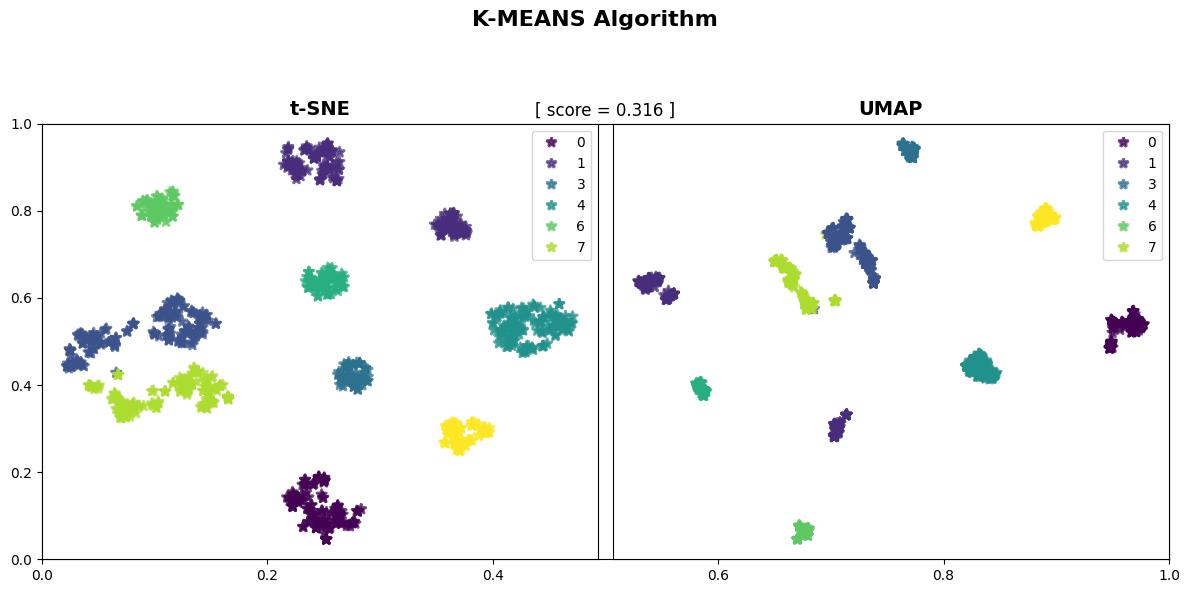

In [130]:
args = {"n_clusters": 9, "random_state":10}
show_results(kmeans_algorithm, args)

## 2. Agglomerative Clustering

Next, we apply **Agglomerative Clustering**, which builds clusters hierarchically. We can specify the number of clusters, and the algorithm will recursively merge data points or clusters based on the chosen distance metric.

Agglomerative Clustering, with its hierarchical nature, gives us insight into how data points are merged based on different distances.

In [47]:
def agglo_algorithm(data, args):
    agglo = AgglomerativeClustering(**args)
    agglo_labels = agglo.fit_predict(data)
    score = silhouette_score(data, agglo_labels)
    return {
        "labels": agglo_labels,
        "score": score,
        "dist": args["metric"],
        "name": "Agglomerative Clustering"
    }

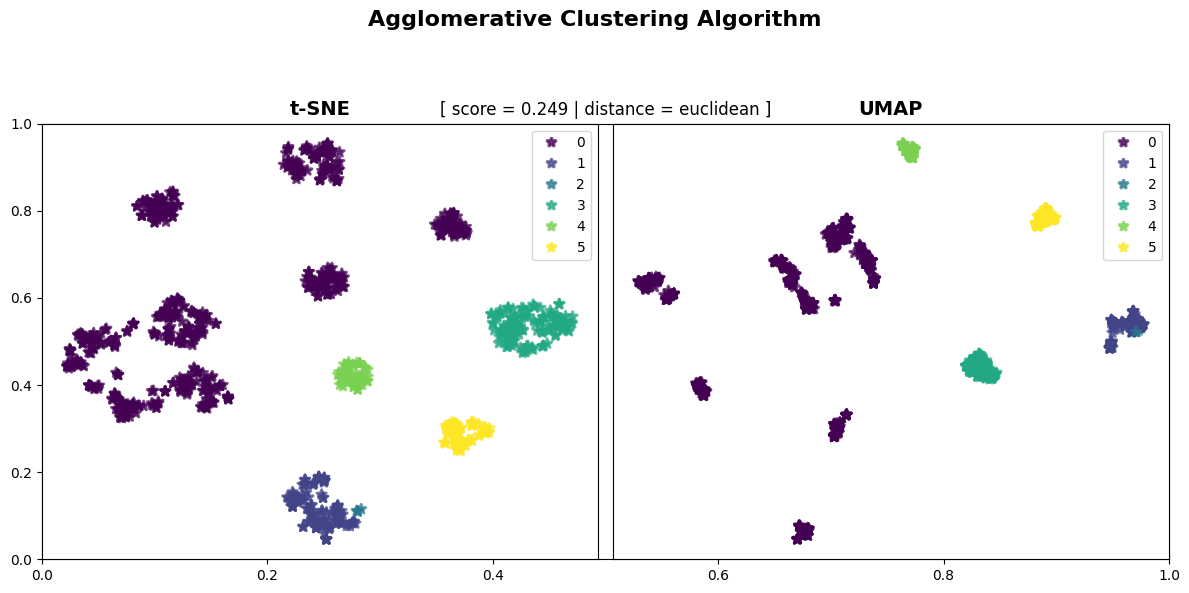

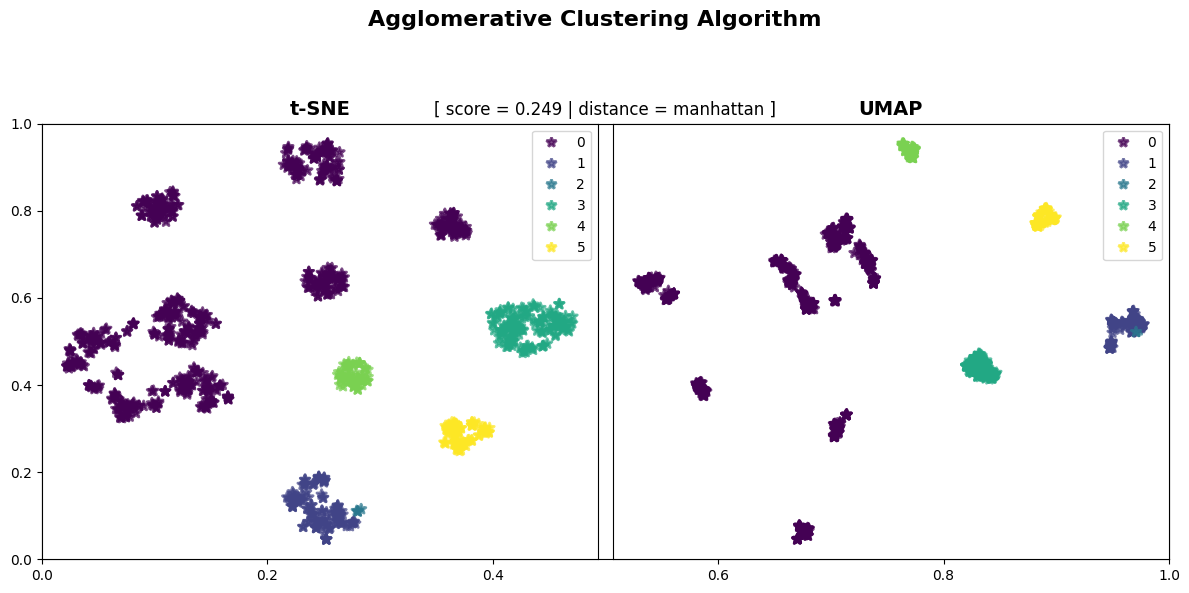

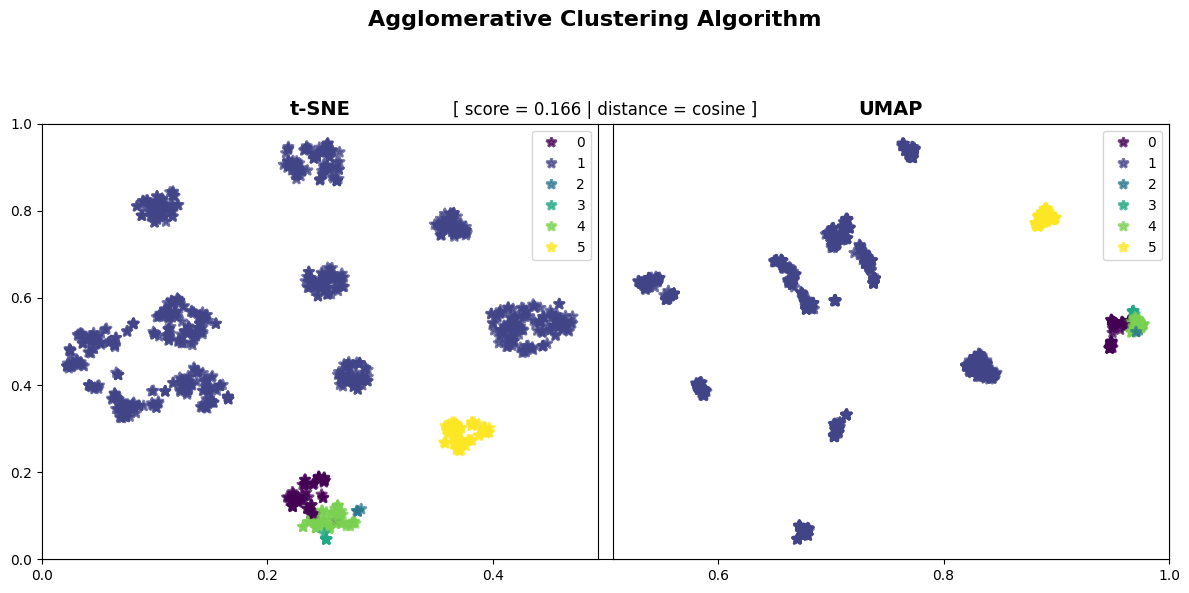

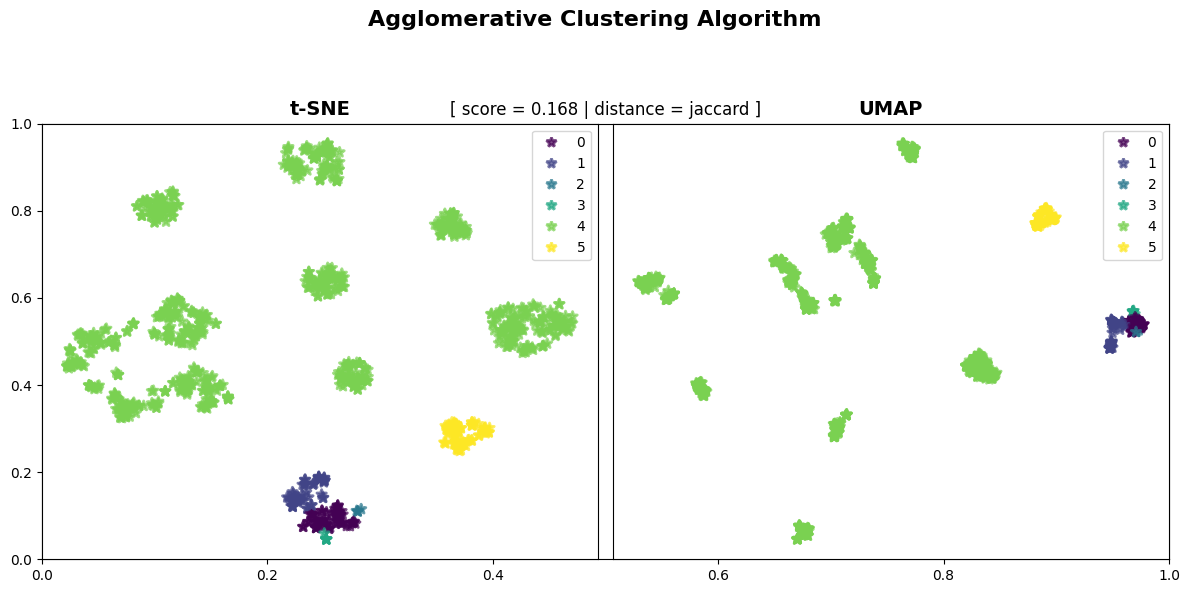

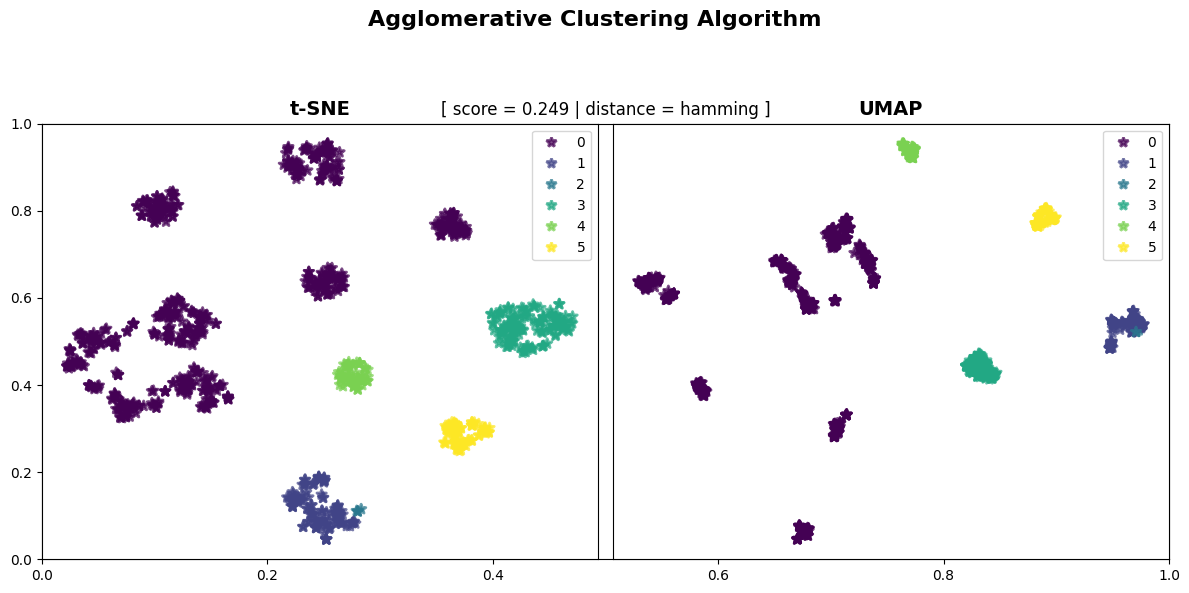

In [132]:
for dist in distances:
    args = {"n_clusters": 6, "metric": dist, "linkage": "average"}
    show_results(agglo_algorithm, args)

we are going to try again with 9 clusters as we did before with K-Means

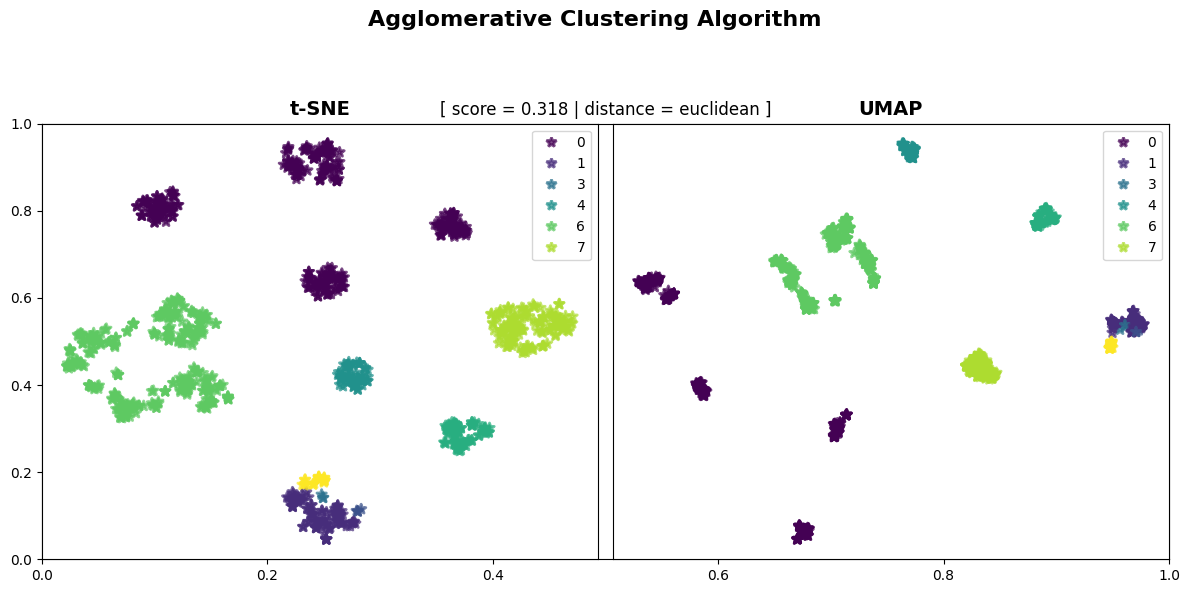

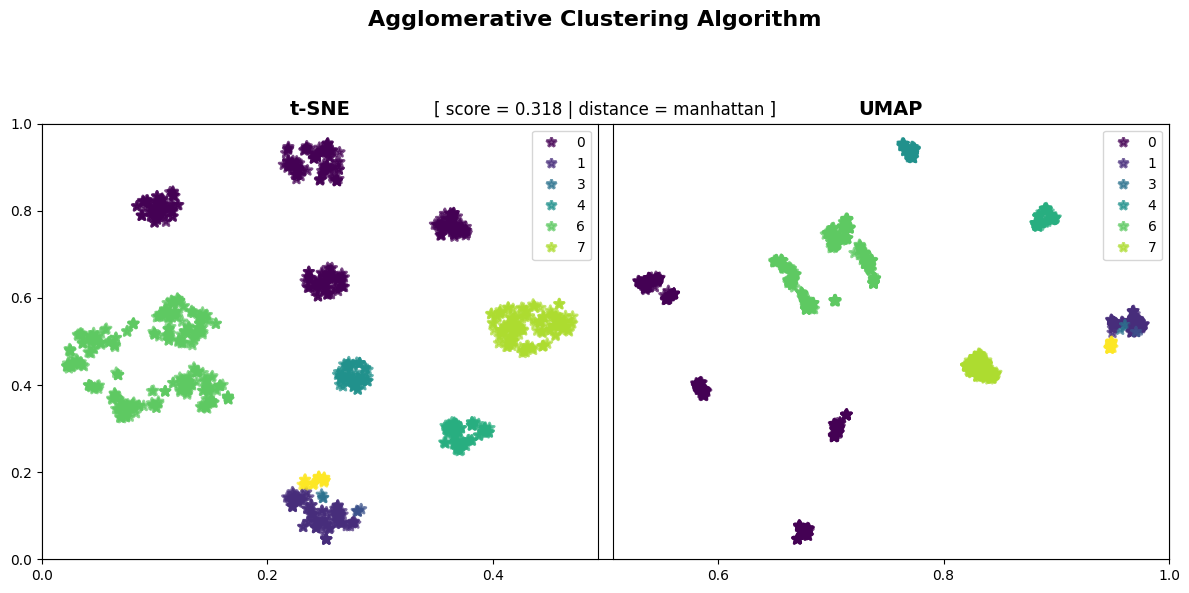

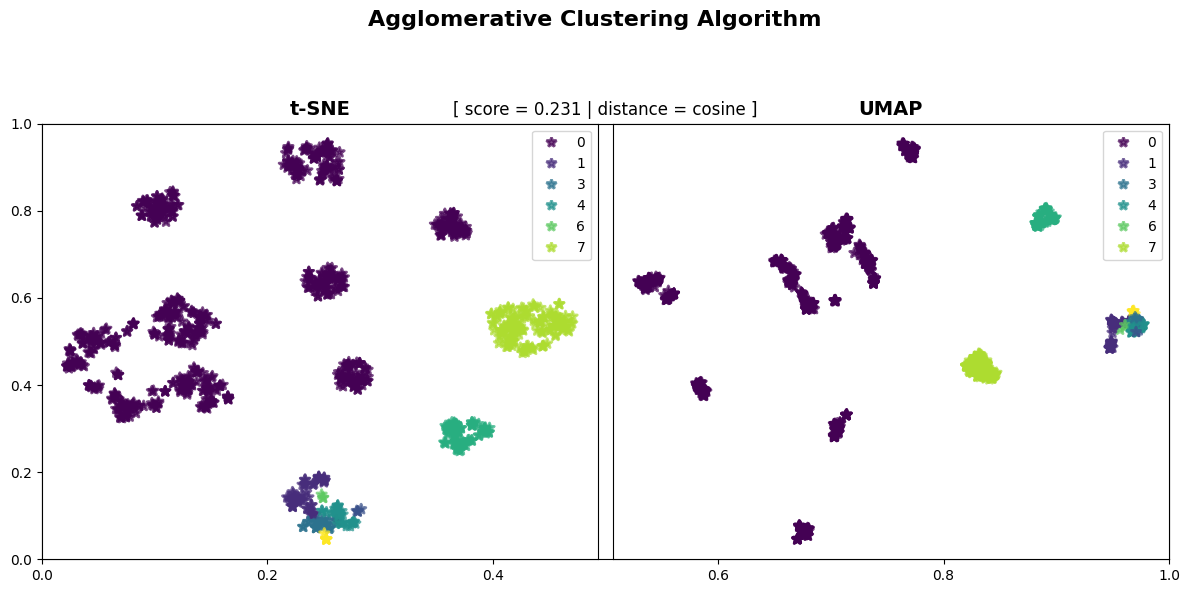

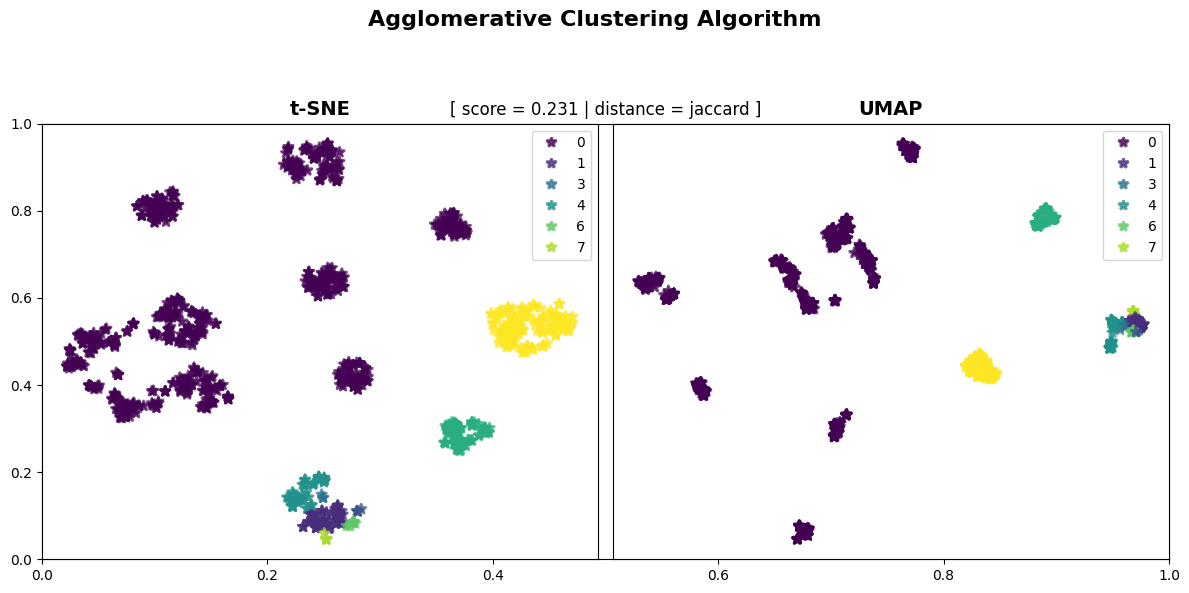

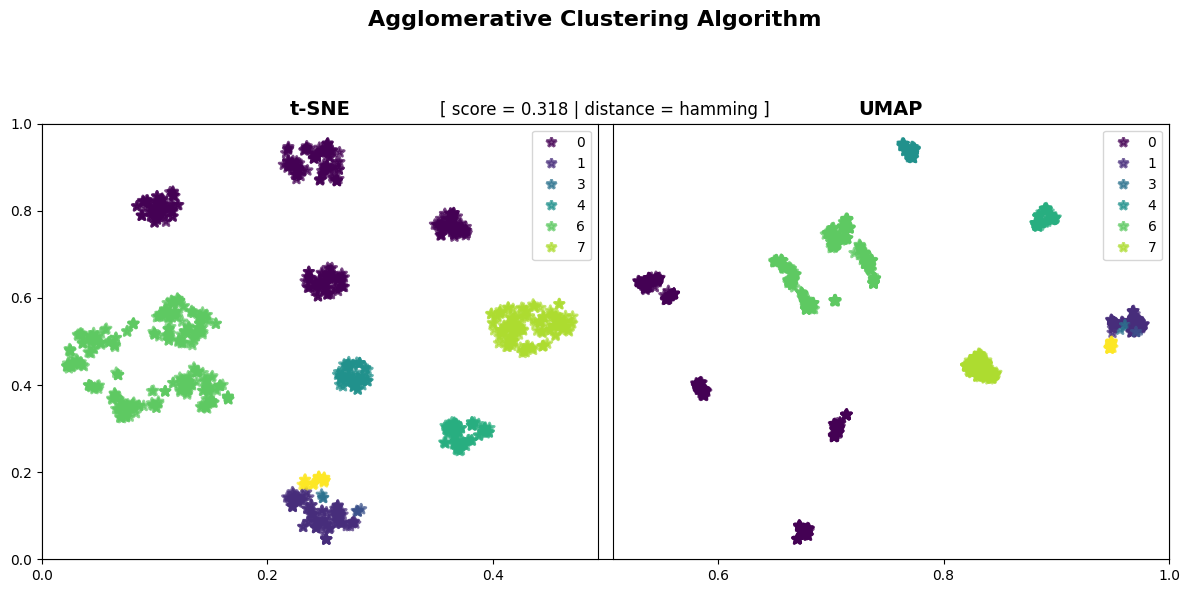

In [70]:
for dist in distances:
    args = {"n_clusters": 9, "metric": dist, "linkage": "average"}
    show_results(agglo_algorithm, args)

## 3. DBSCAN

Finally, we explore **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**. DBSCAN is particularly useful for discovering clusters in datasets with varying densities, and it can detect outliers as noise.

The parameters we adjust here are:
- **`eps`**: The maximum distance between two points to be considered in the same neighborhood.
- **`min_samples`**: The minimum number of points required to form a dense region (i.e., a cluster).


In [60]:
def dbscan_algorithm(data, args):
    dbscan = DBSCAN(**args)
    dbscan_labels = dbscan.fit_predict(data)
    score = silhouette_score(data, dbscan_labels) if len(set(dbscan_labels)) > 1 else "N/A"
    return {
        "labels": dbscan_labels,
        "score": score,
        "dist": args["metric"],
        "name": "DBSCAN"
    }

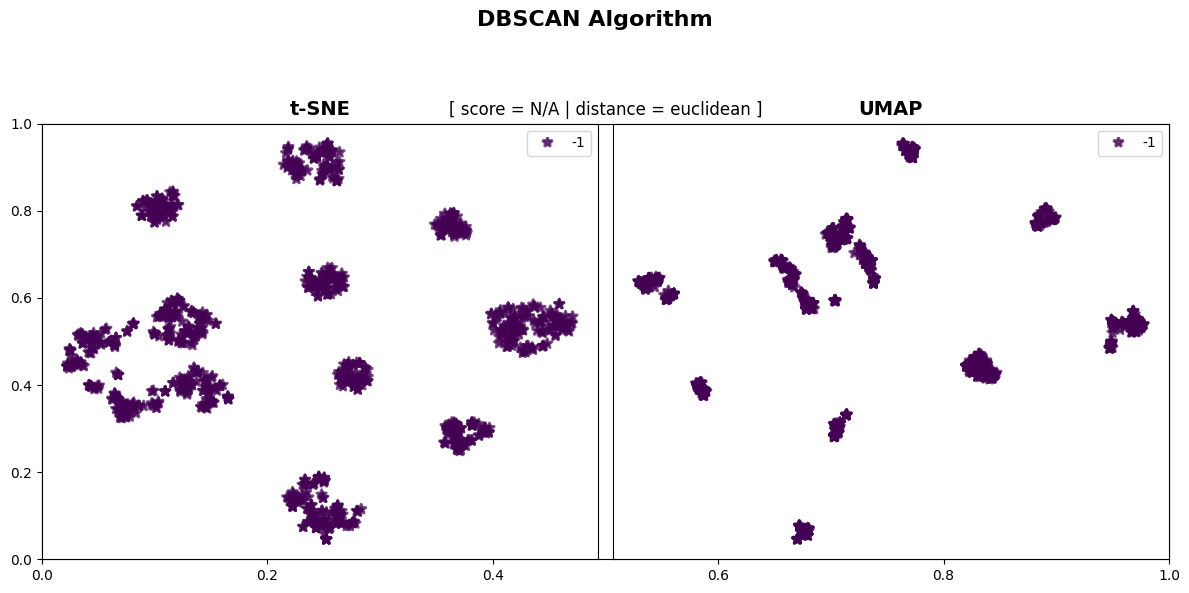

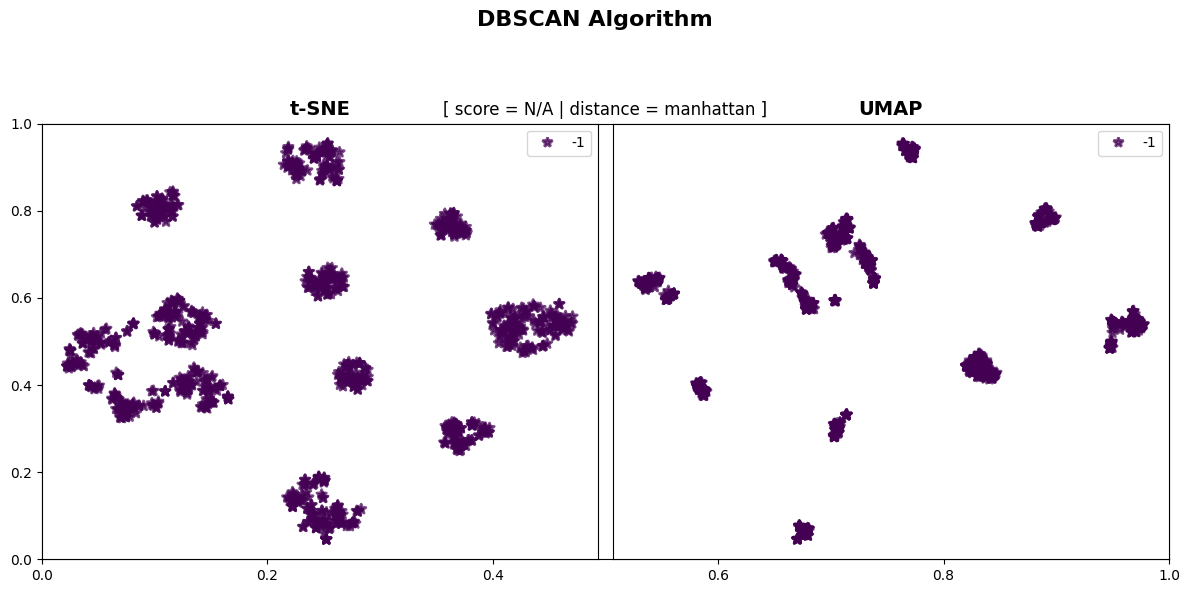

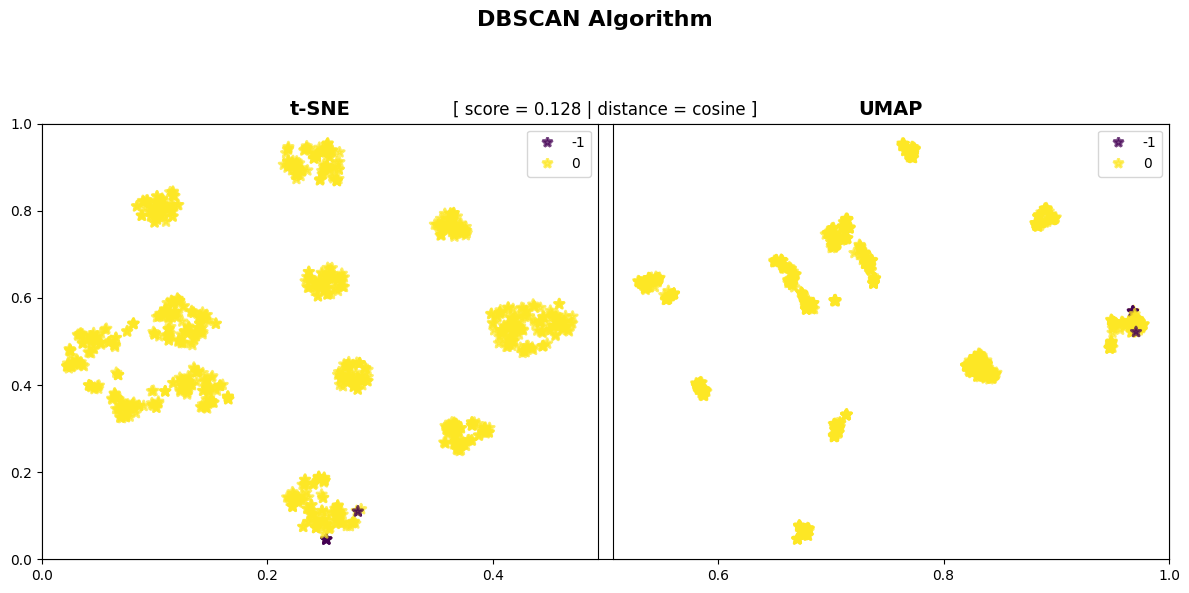

C:\Users\javie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\pairwise.py:2361: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


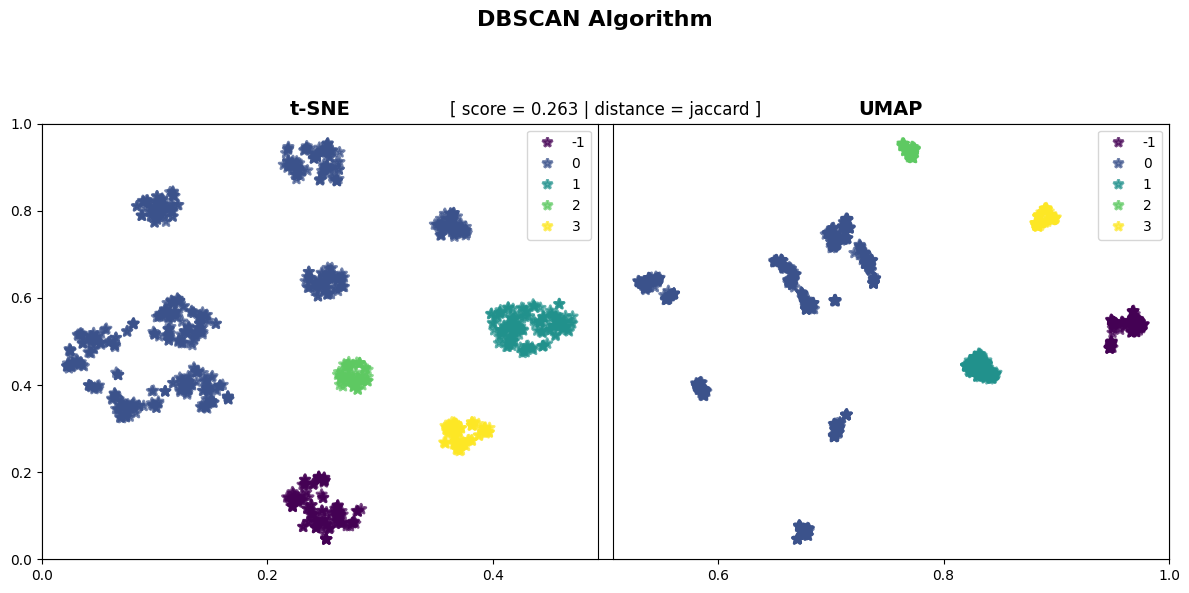

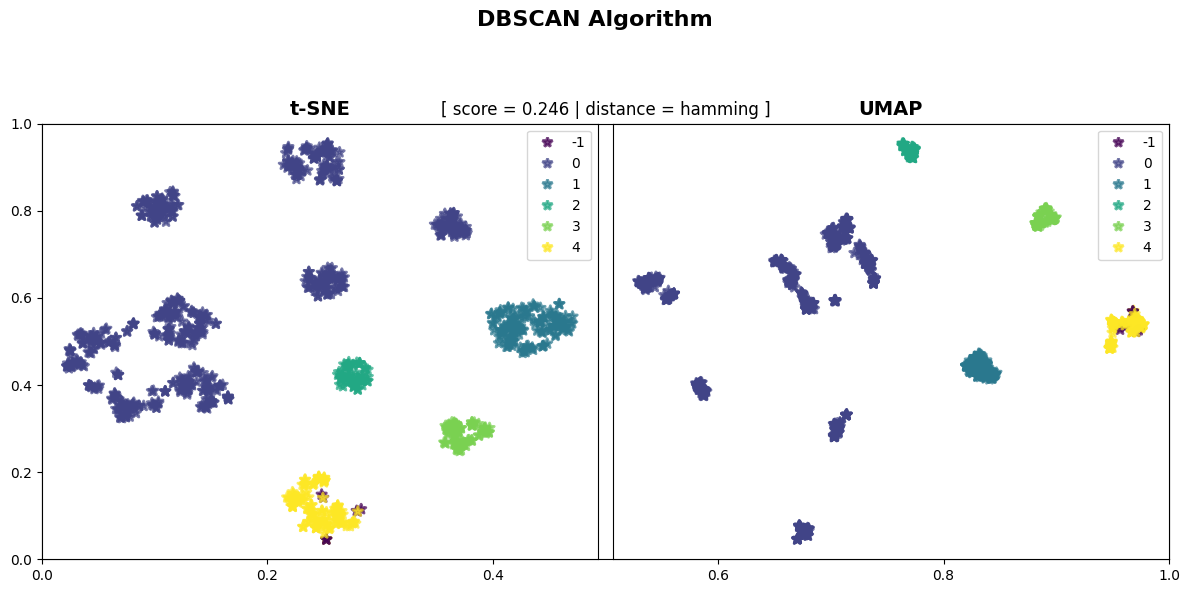

In [71]:
for dist in distances:
    args = {"metric": dist, "eps": 0.2, "min_samples": 30}
    show_results(dbscan_algorithm, args)

DBSCAN's flexibility with different distance metrics and parameters like eps and min_samples makes it ideal for datasets where clusters are not spherical or uniform in size.

However, one challenge with DBSCAN is its sensitivity to the chosen distance metric. We observe that certain metrics, such as **Euclidean distance**, can perform poorly when dealing with binary data. In particular, DBSCAN classify many points as outliers, which is not ideal. This happens because Euclidean distance is better suited for continuous data, and when applied to binary data, it may fail to capture the underlying structure.

## 4. GMM Clustering

We also apply **Gaussian Mixture Models (GMM)** to our dataset. GMM is a probabilistic model that assumes the data is generated from a mixture of several Gaussian distributions. Each cluster is represented by a Gaussian distribution, characterized by its mean and variance.

The primary parameter for GMM is:
- **`n_components`**: The number of Gaussian components (clusters) in the model.

Unlike KMeans, which assigns points to clusters based on hard boundaries, GMM assigns probabilities to points being part of each cluster. This probabilistic approach is beneficial when clusters overlap or when we want a soft assignment of points to clusters.


In [74]:
from sklearn.mixture import GaussianMixture

def gmm_algorithm(data, args):
    gmm = GaussianMixture(**args)
    gmm_labels = gmm.fit_predict(data)
    score = silhouette_score(data, gmm_labels) if len(set(gmm_labels)) > 1 else "N/A"
    
    return {
        "labels": gmm_labels,
        "score": score,
        "name": "GMM"
    }

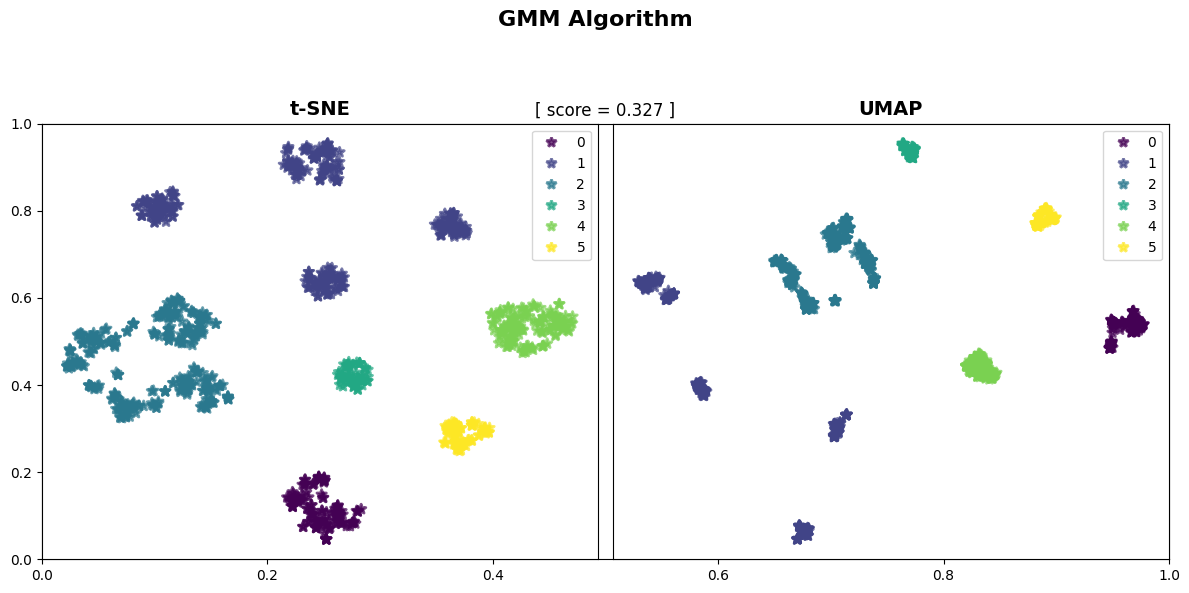

In [83]:
args = args = {"n_components": 6, "covariance_type": "full", "random_state": 10} 
show_results(gmm_algorithm, args)

# Clustering Performance - Scores and Summary

In this section, we summarize the performance of all clustering algorithms we applied (KMeans, DBSCAN, Agglomerative Clustering, and GMM) by visualizing their silhouette scores across different parameter settings and distance metrics.

### Overview of the Plot

The scatter plot shows the **silhouette score** (on the x-axis) for each combination of algorithm and distance metric. The different clustering algorithms are represented by **colors** (via the `hue` parameter), while the **shapes** of the markers correspond to the different distance metrics (e.g., Euclidean, Manhattan, etc.).

- **Silhouette Score**: This metric measures how well-separated the clusters are. A higher silhouette score indicates that the clusters are well-formed and the data points within each cluster are close to each other, while data points from different clusters are far apart.
  
### Key Aspects of the Plot
1. **Y-axis**: Represents the different parameter combinations for each clustering algorithm, such as `k` values for KMeans or `eps` values for DBSCAN.
2. **X-axis**: Displays the corresponding silhouette scores for each combination, allowing us to directly compare the performance of each algorithm under varying conditions.
3. **Markers**: Different shapes are used to represent the **distance metrics** (such as Euclidean, Manhattan, Cosine, etc.), making it easy to visually separate the impact of the chosen distance on each algorithm's performance.
4. **Legend**: Located in the upper-right corner, it shows the mapping of colors to algorithms and shapes to distance metrics, allowing us to interpret the results effectively.

### Interpretation

This plot gives a clear, comparative view of the performance of all clustering algorithms and their parameter choices. By comparing the silhouette scores, we can identify:
- Which clustering algorithm performs best overall for the dataset.
- How the choice of distance metric affects each algorithm's performance.
- The parameter settings that yield the highest silhouette scores for each algorithm, helping us select the optimal configuration for our data.

This summary plot is a useful tool to quickly assess and compare the effectiveness of different clustering approaches.


In [ ]:
# Prepare a dictionary to collect the scores for each algorithm
results = {
    "Algorithm": [],
    "Param": [],
    "Distance": [],
    "Score": [],
}

# Define algorithms and parameters
kmeans_ks = [2, 4, 6, 8, 9, 12, 15]
dbscan_epsilons = [0.1, 0.2, 0.3, 0.4, 0.5]
distances = ['euclidean', 'manhattan', 'cosine', 'jaccard', 'hamming']

# KMeans
for k in kmeans_ks:
    args = {"n_clusters": k, "random_state": 10}
    info = kmeans_algorithm(data, args)
    results["Algorithm"].append("KMeans")
    results["Param"].append(f"n_clusters={k}")
    results["Distance"].append("euclidean")
    results["Score"].append(info["score"])

# DBSCAN
for eps in dbscan_epsilons:
    for dist in distances:
        args = {"eps": eps, "min_samples": 30, "metric": dist}
        info = dbscan_algorithm(data, args)
        results["Algorithm"].append("DBSCAN")
        results["Param"].append(f"eps={eps}")
        results["Distance"].append(dist)
        results["Score"].append(info["score"])

# Agglomerative
for dist in distances:
    for n_clusters in kmeans_ks:
        args = {"n_clusters": n_clusters, "metric": dist,  "linkage": "average"}
        info = agglo_algorithm(data, args)
        results["Algorithm"].append("Agglomerative")
        results["Param"].append(f"n_clusters={n_clusters}")
        results["Distance"].append(dist)
        results["Score"].append(info["score"])

# GMM
for n_components in kmeans_ks:
    args = {"n_components": n_components, "random_state": 10}
    info = gmm_algorithm(data, args)
    results["Algorithm"].append("GMM")
    results["Param"].append(f"n_clusters={n_components}")
    results["Distance"].append("Nan")
    results["Score"].append(info["score"])

# Convert the results into a pandas DataFrame for easier plotting
results_df = pd.DataFrame(results)


In [133]:
results_df = results_df.map(lambda x : None if x == "N/A" else x).dropna().reset_index(drop=True)
results_df

,Algorithm,Param,Distance,Score
0,KMeans,n_clusters=2,euclidean,0.216939
1,KMeans,n_clusters=4,euclidean,0.245685
2,KMeans,n_clusters=6,euclidean,0.327481
3,KMeans,n_clusters=8,euclidean,0.282651
4,KMeans,n_clusters=9,euclidean,0.316316
5,KMeans,n_clusters=12,euclidean,0.308494
6,KMeans,n_clusters=15,euclidean,0.254256
7,DBSCAN,eps=0.1,cosine,0.350778
8,DBSCAN,eps=0.1,jaccard,0.309724
9,DBSCAN,eps=0.1,hamming,0.364288


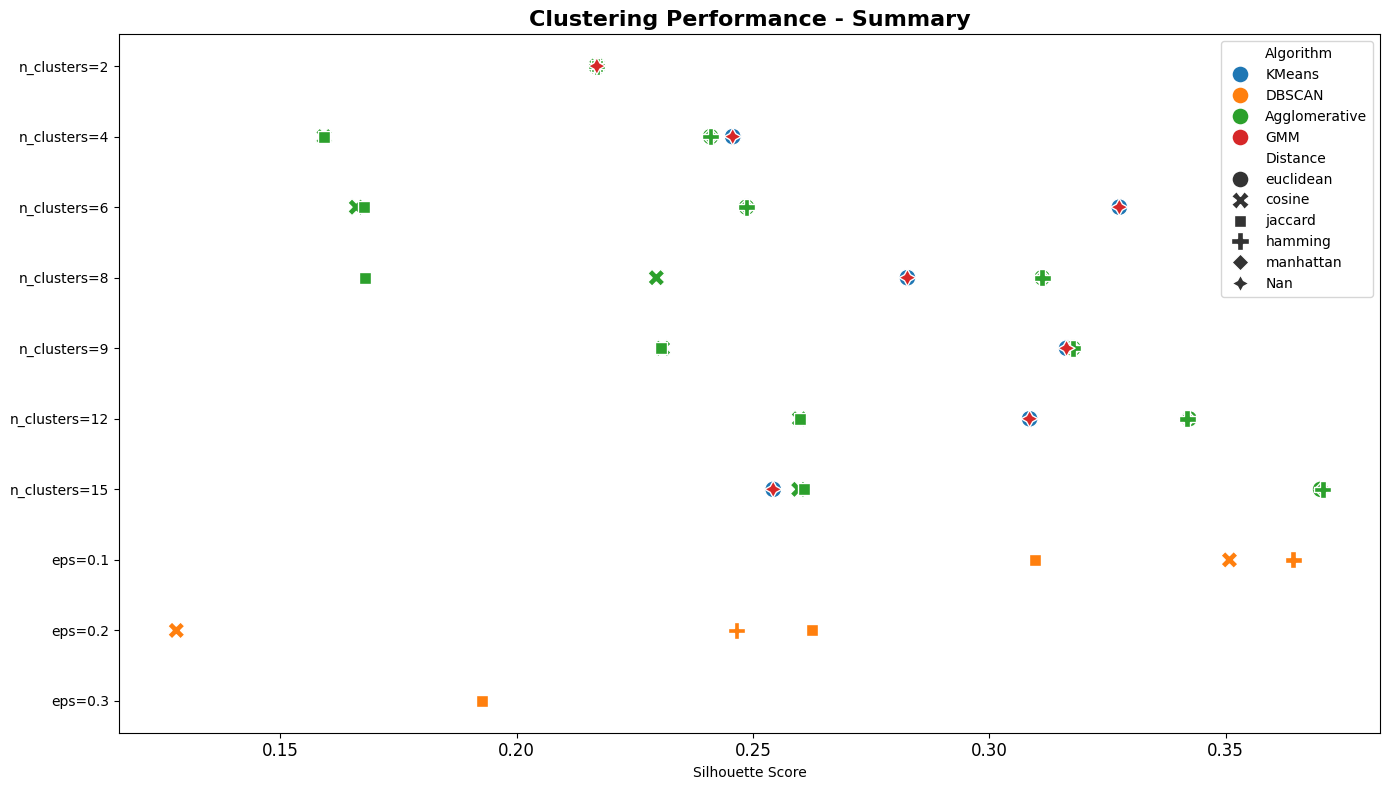

In [134]:
# Set the size of the plot
plt.figure(figsize=(14, 8))

# Use Seaborn's scatterplot with markers based on the distance metric
sns.scatterplot(y="Param", x="Score", hue="Algorithm", style="Distance", data=results_df, s=150)

# Adjust the labels for better readability
plt.xticks(fontsize=12)
plt.ylabel("")
plt.xlabel('Silhouette Score')
plt.title('Clustering Performance - Summary', fontsize=16, weight='bold')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

 - **Agglomerative Clustering** (green markers) shows the best silhouette scores overall, increasing with the number of clusters, with values around 0.3 to more than 0.35 for $n_{clusters} \geq 8$ , particularly Hamming (+) and Manhattan (romb) distances.

 - **KMeans** (blue markers) performs well for n_clusters = 6, as we discovered before, with silhouette scores grather than 0.30. But in general acts with a intermediate result.

 - **DBSCAN** (orange markers) performs poorly across epsilon 0.3 and a bit better with 0.2. But we can observe a huge diference with $epsilon = 0.1$, with silhouette scores bigger than 0.35.

 - **GMM** (red markers) provides moderate performance, with scores around 0.3, which are stable but not as high as Agglomerative Clustering or KMeans with some specif parameters.

# Conclusion

This project explored the application of various **unsupervised learning** algorithms on a dataset with predominantly binary data. We focused on clustering techniques, including **KMeans**, **DBSCAN**, **Agglomerative Clustering**, and **Gaussian Mixture Models (GMM)**, while utilizing different distance metrics and dimensionality reduction techniques (t-SNE, UMAP) to evaluate and visualize the results.

The **silhouette score** and **elbow method** were used to guide the selection of optimal clusters, and these methods were complemented by visual analysis through t-SNE and UMAP plots. The dimensionality reduction helped reveal the structure of the data and highlighted potential improvements, such as the need to test a higher number of clusters in KMeans.

Overall, this project demonstrated the importance of selecting appropriate algorithms, parameters, and distance metrics for clustering binary data. The results showed that different clustering methods can yield varying insights, and visualizations played a crucial role in interpreting the structure of the clusters. This iterative approach to clustering allowed us to refine our understanding of the dataset and optimize the performance of the algorithms applied.